In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
df = pd.read_excel('premiums_young_with_gr.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [102]:
df.shape

(20096, 14)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20096 entries, 0 to 20095
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    20096 non-null  int64 
 1   Gender                 20096 non-null  object
 2   Region                 20096 non-null  object
 3   Marital_status         20096 non-null  object
 4   Number Of Dependants   20096 non-null  int64 
 5   BMI_Category           20096 non-null  object
 6   Smoking_Status         20094 non-null  object
 7   Employment_Status      20095 non-null  object
 8   Income_Level           20092 non-null  object
 9   Income_Lakhs           20096 non-null  int64 
 10  Medical History        20096 non-null  object
 11  Insurance_Plan         20096 non-null  object
 12  Annual_Premium_Amount  20096 non-null  int64 
 13  Genetical_Risk         20096 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 2.1+ MB


## Handling NA values

In [104]:
df.isna().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           2
Employment_Status        1
Income_Level             4
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
Genetical_Risk           0
dtype: int64

In [105]:
df[df['Smoking_Status'].isna()]

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
6853,23,Male,Southwest,Unmarried,0,Normal,NaN,Freelancer,<10L,3,No Disease,Bronze,6001,2
7757,19,Female,Northeast,Unmarried,0,Normal,NaN,Salaried,10L - 25L,23,No Disease,Bronze,9010,5


In [106]:
#since the entries are very less we can drop these

In [107]:
df.dropna(inplace=True)
df.isna().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           0
Employment_Status        0
Income_Level             0
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
Genetical_Risk           0
dtype: int64

In [108]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [109]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

# Handling Outliers

## Numerical Columns

In [110]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [111]:
numeric_columns = df.select_dtypes(['int64','float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

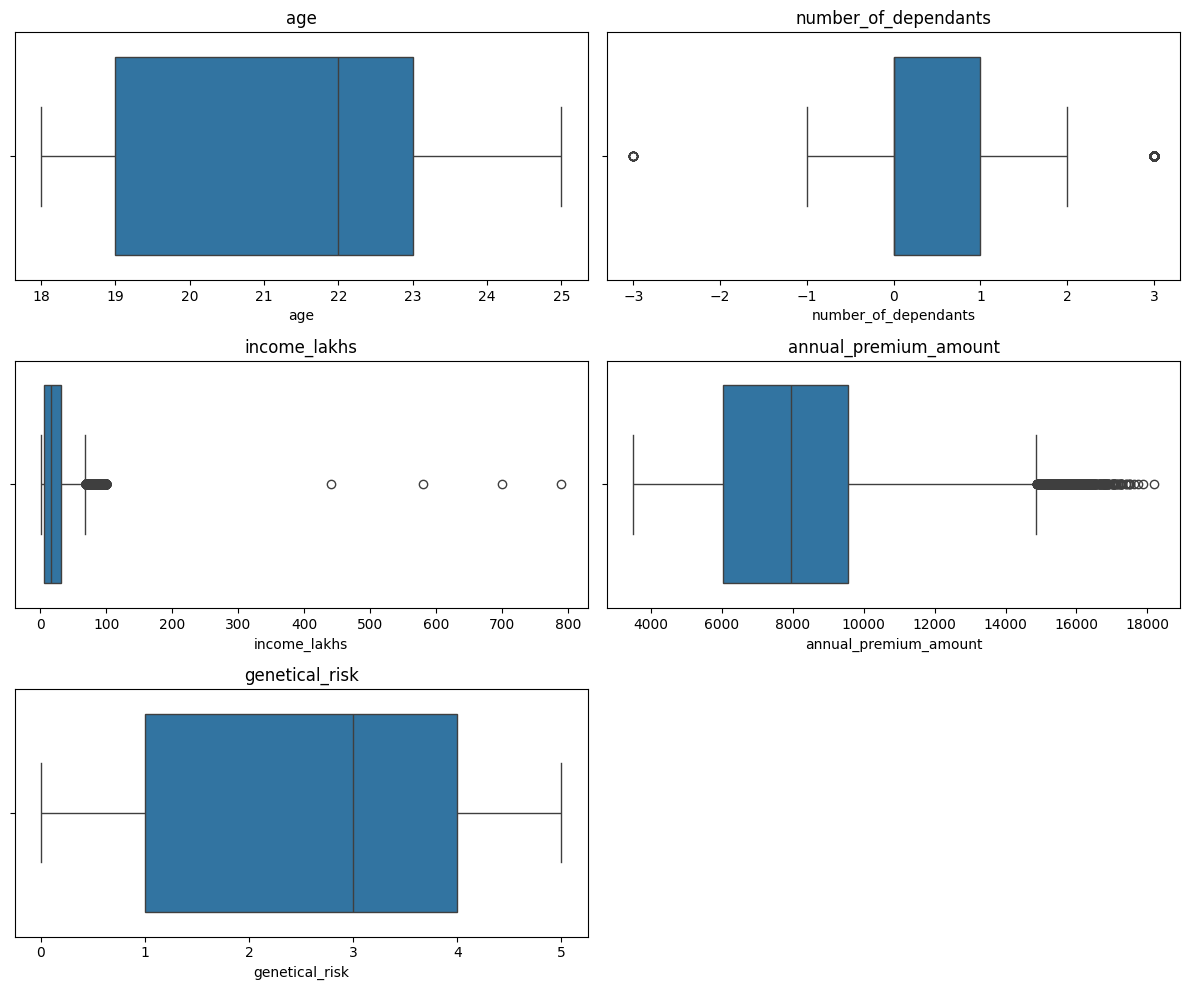

In [115]:
# Create 3x2 grid = 6 plots (we’ll use only 5)
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to 1D array

# Plot 5 boxplots
for ax, column in zip(axes, numeric_columns[:5]):
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(column)

# Remove the unused 6th subplot
if len(axes) > 5:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

In [117]:
# No outliers in age column

### AGE

In [118]:
print(df[df.age>100]['age'].unique())
df[df.age>100]['age'].value_counts().sum()

[]


np.int64(0)

In [119]:
df[df.age<=100].shape

(20090, 14)

In [120]:
df.shape[0]-58


20032

In [121]:
df1 = df[df['age']<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [122]:
df.shape,df1.shape

((20090, 14), (20090, 14))

### number_of_dependants

In [123]:
## number of dependants are having -ve values fixing it

In [124]:
df1[df1['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1])

In [125]:
# only 2 enteries making it +ve

In [126]:
df1['number_of_dependants']=df1['number_of_dependants'].abs()

In [127]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


### income_lakhs

In [128]:
df1.income_lakhs.describe()

count    20090.000000
mean        22.510851
std         23.420493
min          1.000000
25%          6.000000
50%         16.000000
75%         31.000000
max        790.000000
Name: income_lakhs, dtype: float64

In [129]:
def iqr_bounds(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return lower_bound,upper_bound

In [130]:
iqr_bounds(df1['income_lakhs'])

(-31.5, 68.5)

In [131]:
#lower_bound < min : no issues
#upper_bound < max : issues 
#generally values > upper_bound treated as outliers

In [132]:
df1.income_lakhs.quantile(0.98),df.income_lakhs.quantile(0.999)

(np.float64(90.0), np.float64(100.0))

In [133]:
# see 98% people earning < 91 lakhs
# 99% people earning < 1cr
#lets consider 100 (1cr) as our upper bound

In [134]:
income_threshold = df1.income_lakhs.quantile(0.999)
print(df1[df1.income_lakhs>income_threshold].shape)
df1[df1['income_lakhs']<=income_threshold]['income_lakhs'].describe()

(4, 14)


count    20086.000000
mean        22.390371
std         21.732062
min          1.000000
25%          6.000000
50%         16.000000
75%         31.000000
max        100.000000
Name: income_lakhs, dtype: float64

In [135]:
df2 = df1[df1.income_lakhs<=income_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


### Analyzing distribution

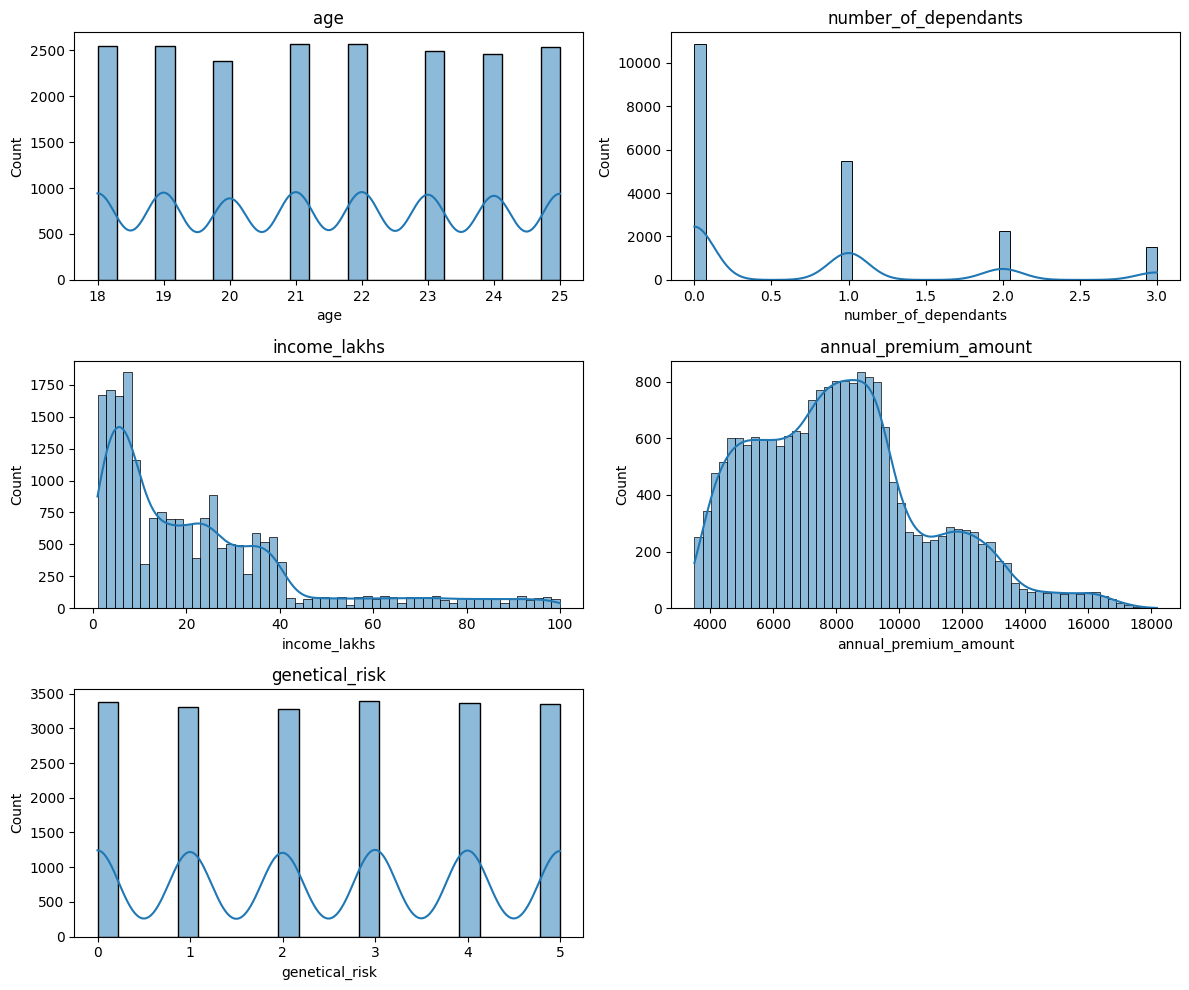

In [141]:
# Create 3x2 subplots = 6 total (1 extra)
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten into 1D array

# Plot histograms for first 5 numeric columns
for i, column in enumerate(numeric_columns[:5]):
    sns.histplot(df2[column], kde=True, ax=axes[i])
    axes[i].set_title(column)

# Remove the 6th unused subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

### Bivariate Analysis

In [142]:
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

In [143]:
for i in numeric_columns:
    print(i)

age
number_of_dependants
income_lakhs
annual_premium_amount
genetical_risk


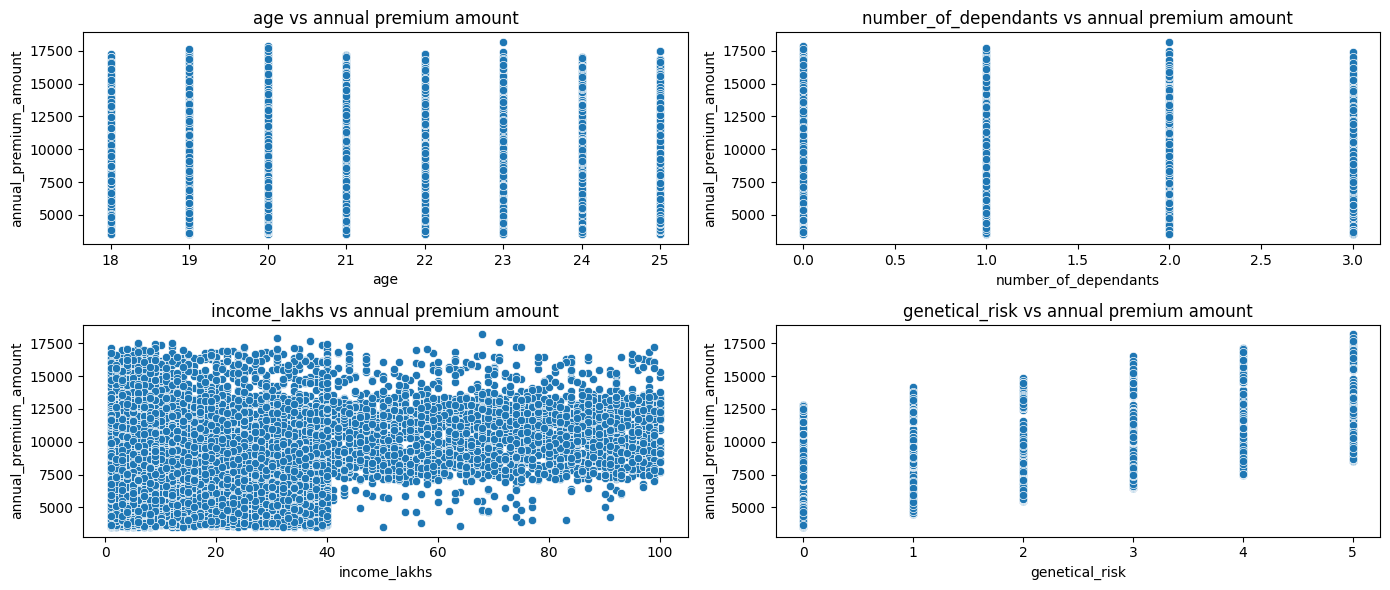

In [147]:
numeric_features = ['age', 'number_of_dependants', 'income_lakhs','genetical_risk']
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

# Flatten axes to 1D
axes = axes.flatten()

# Loop through columns and axes
for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df2[column],y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs annual premium amount')

plt.tight_layout()
plt.show()

## Categorical Columns

In [148]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [149]:
categorical_columns = ['gender', 'region', 'marital_status','bmi_category', 'smoking_status', 'employment_status', 'income_level','medical_history', 'insurance_plan']

In [150]:
for col in categorical_columns:
    print(f'{col} : ',df2[col].unique())

gender :  ['Male' 'Female']
region :  ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status :  ['Unmarried' 'Married']
bmi_category :  ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status :  ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status :  ['Self-Employed' 'Freelancer' 'Salaried']
income_level :  ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history :  ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan :  ['Silver' 'Bronze' 'Gold']


In [151]:
df2['smoking_status'].replace({'Smoking=0':'No Smoking',
                               'Does Not Smoke':'No Smoking',
                               'Not Smoking':'No Smoking'},
                                inplace=True)

/var/folders/kg/11tps70n3wb66s6pg8w0z5bc0000gn/T/ipykernel_7681/4099879302.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({'Smoking=0':'No Smoking',


In [152]:
df2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

### Univariate Analysis

<Axes: xlabel='gender'>

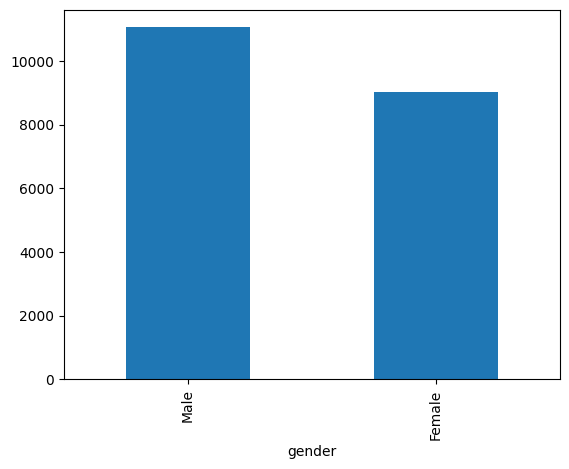

In [153]:
df2['gender'].value_counts().plot(kind='bar')

In [154]:
len(categorical_columns)

9

In [155]:
pct_cnt = df2['gender'].value_counts()
pct_cnt.values

array([11055,  9031])

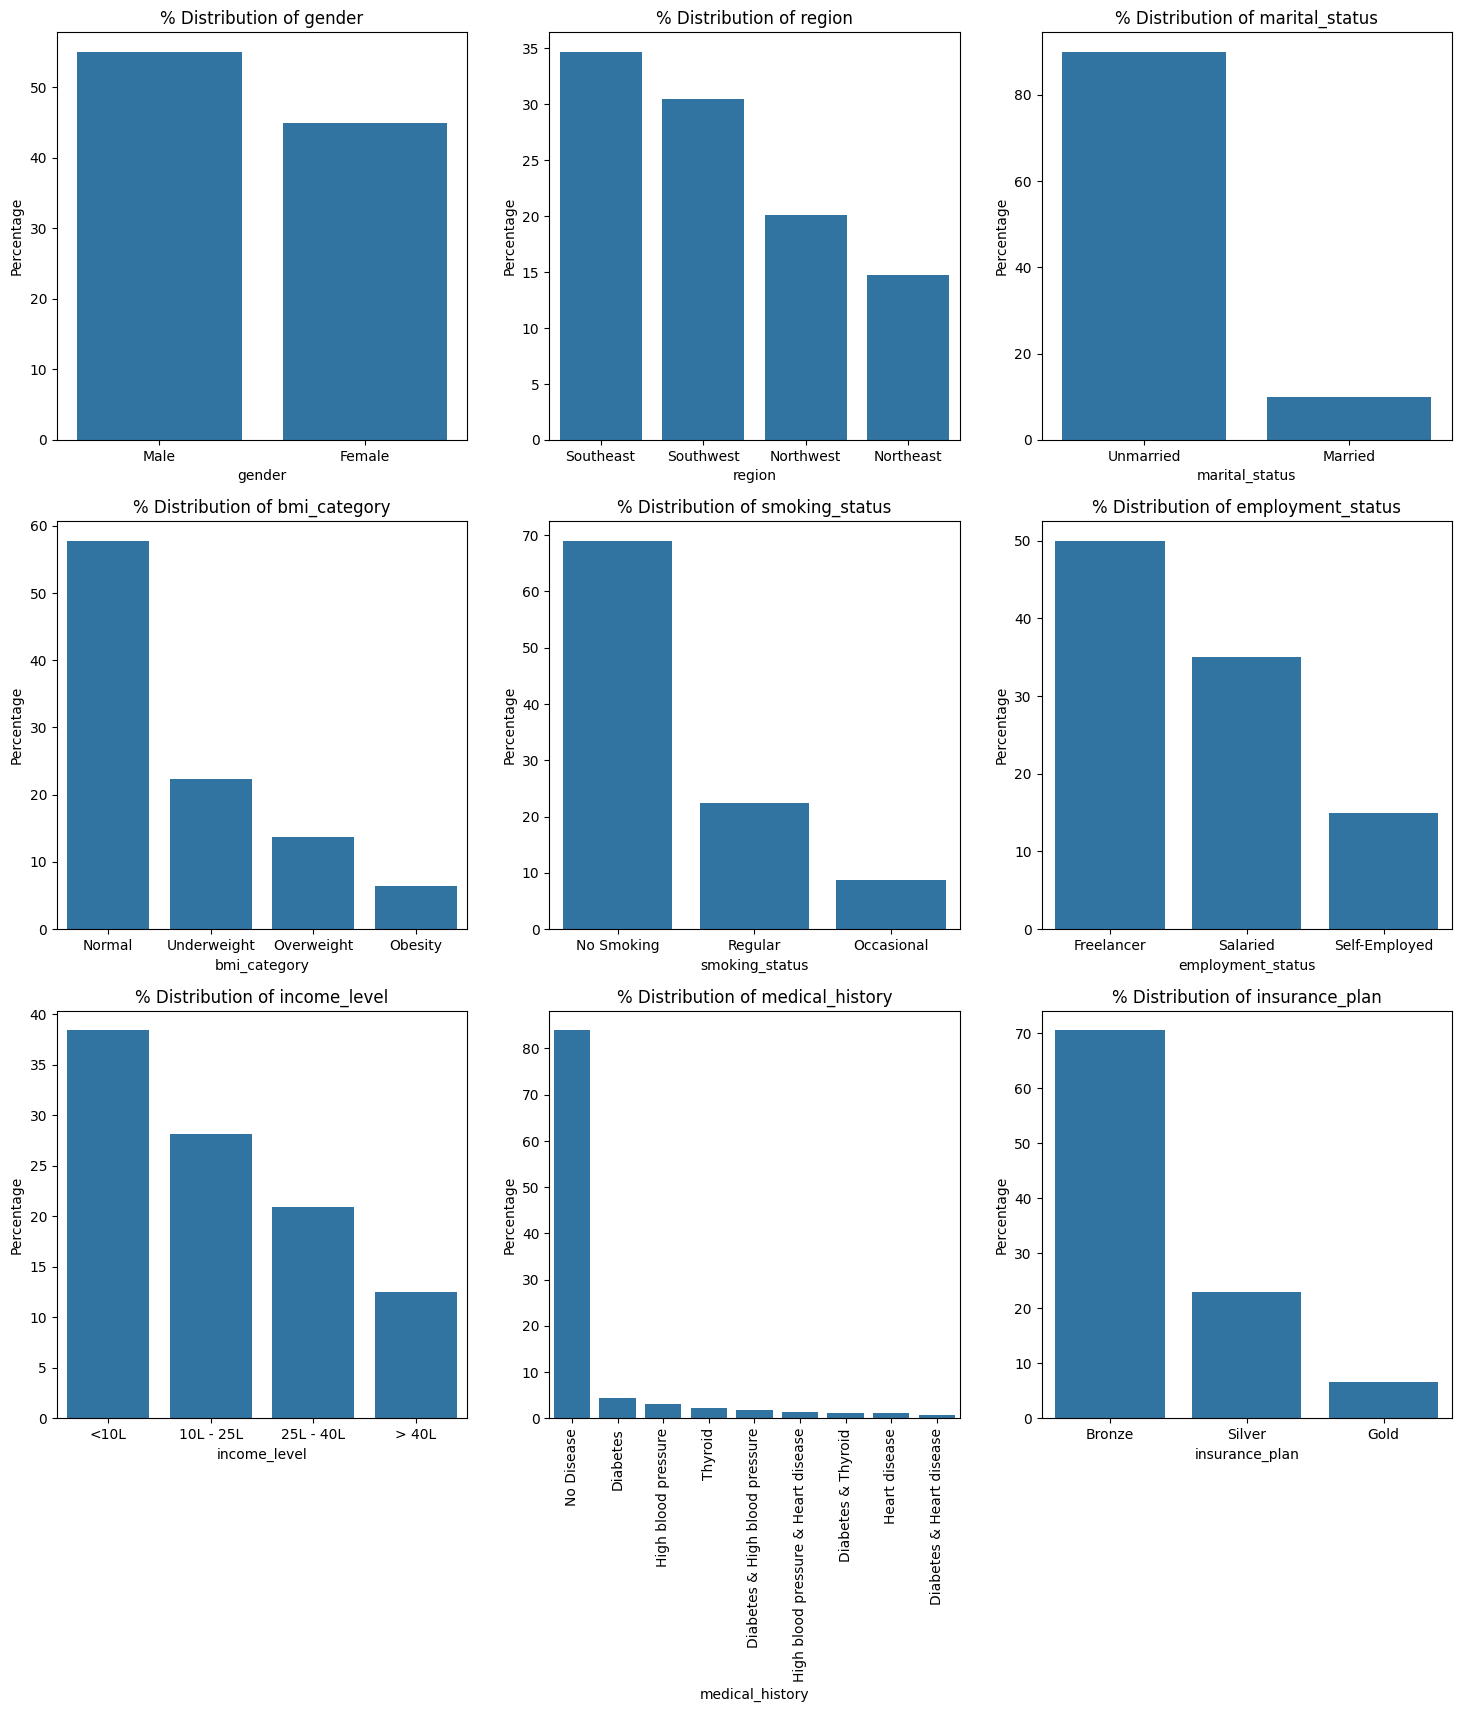

In [156]:
fig,axes = plt.subplots(3,3,figsize=(18,18))
axes = axes.flatten() #flatten 2d array (must use this)

for ax,columns in zip(axes,categorical_columns):
    categ_counts = df2[columns].value_counts(normalize=True)*100
    sns.barplot(x=categ_counts.index,y=categ_counts.values,ax=ax)
    ax.set_title(f'% Distribution of {columns}')
    ax.set_ylabel('Percentage')
    if columns=='medical_history':
        ax.tick_params(axis='x', labelrotation=90)


### Bivariate Analysis

In [157]:
crosstab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4508,326,828
25L - 40L,3382,209,608
<10L,6172,404,1145
> 40L,115,366,2023


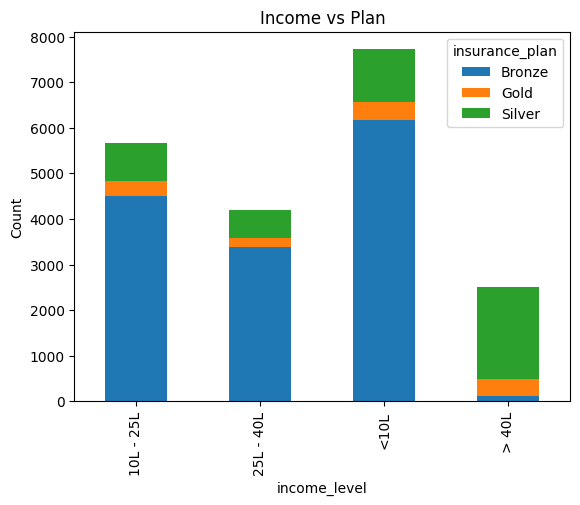

In [158]:
crosstab.plot(kind='bar',stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

In [159]:
# anlayzing using heatmap for better understanding

<Axes: xlabel='insurance_plan', ylabel='income_level'>

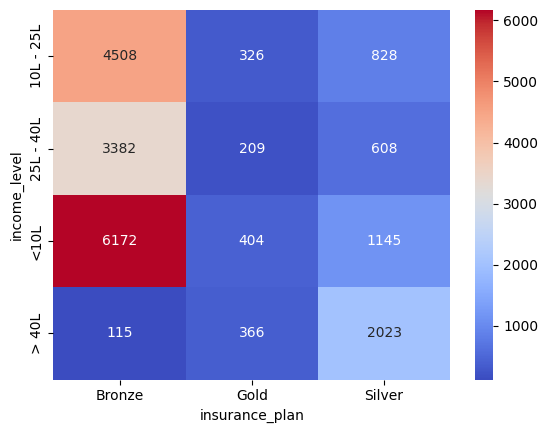

In [160]:
sns.heatmap(crosstab,annot=True,cmap='coolwarm',fmt='d')

## Feature Engineering

In [161]:
df2.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4


In [162]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [163]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

/var/folders/kg/11tps70n3wb66s6pg8w0z5bc0000gn/T/ipykernel_7681/746615070.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
/var/folders/kg/11tps70n3wb66s6pg8w0z5bc0000gn/T/ipykernel_7681/746615070.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [164]:
# Normalizing risk_score
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()

df2['normalized_risk_score'] = (df2['total_risk_score']-min_score)/(max_score-min_score)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,none,0,0.000000


## Encoding Text Columns

### Label encoding : Odinal data

In [165]:
df2['insurance_plan'].unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [166]:
df2['insurance_plan'] =df2['insurance_plan'].map({'Bronze':1,'Silver':2,'Gold':3})

In [167]:
df2['income_level'].unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [168]:
df2['income_level']= df2['income_level'].map({'<10L':1,'10L - 25L':2,'25L - 40L':3,'> 40L':4,})

### One hot encoding : Nominal Data

In [169]:
df2.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,4,high blood pressure,none,6,0.428571


In [170]:
nominal_col = ['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3 = pd.get_dummies(df2,columns=nominal_col,drop_first=True,dtype=int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20086 entries, 0 to 20095
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              20086 non-null  int64  
 1   number_of_dependants             20086 non-null  int64  
 2   income_level                     20086 non-null  int64  
 3   income_lakhs                     20086 non-null  int64  
 4   medical_history                  20086 non-null  object 
 5   insurance_plan                   20086 non-null  int64  
 6   annual_premium_amount            20086 non-null  int64  
 7   genetical_risk                   20086 non-null  int64  
 8   disease1                         20086 non-null  object 
 9   disease2                         20086 non-null  object 
 10  total_risk_score                 20086 non-null  int64  
 11  normalized_risk_score            20086 non-null  float64
 12  gender_Male            

In [171]:
df3.head(1)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1


In [172]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head(1)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


## Calculate VIF Multicolinearity

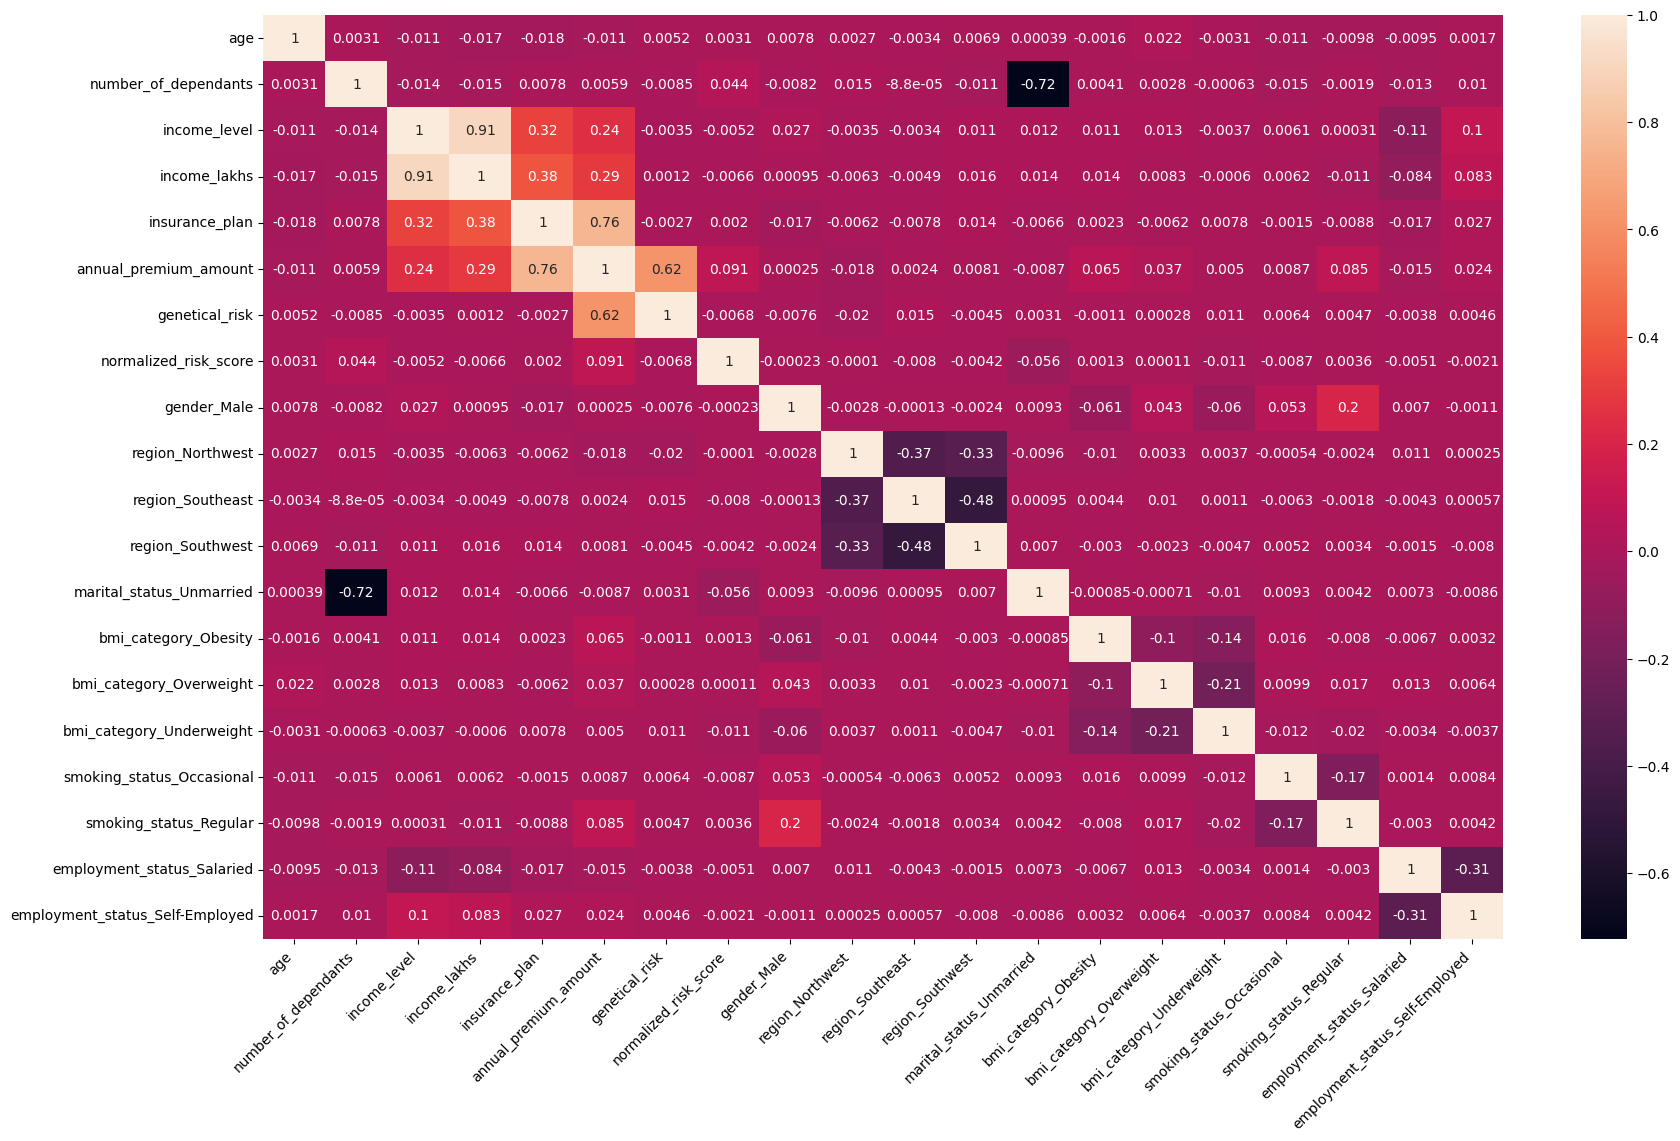

In [173]:
cm = df4.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.show()

In [209]:
X = df4.drop('annual_premium_amount',axis=1)
y = df4['annual_premium_amount']

col_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
X.describe()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [210]:
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,1.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,1.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.333333,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.333333,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [211]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Columns'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

calc_vif(X)    

,Columns,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalized_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [212]:
calc_vif(X.drop('income_level',axis=1))

,Columns,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [213]:
X_reduced = X.drop('income_level',axis=1)
X_reduced.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.0,0.0,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


## Model Training

In [214]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


In [215]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size=0.30,random_state=10)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_train',y_test.shape)

X_train (14060, 18)
X_test (6026, 18)
y_train (14060,)
y_train (6026,)


### Linear Regreassion Moldel

In [216]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
train_score_lr = model_lr.score(X_train,y_train)
test_score_lr = model_lr.score(X_test,y_test)
train_score_lr,test_score_lr

(0.988297900194864, 0.9887263253056615)

In [217]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test,y_pred)
rmse_lr = np.sqrt(mse_lr)
mse_lr,rmse_lr


(85732.34377930441, np.float64(292.800860277603))

In [218]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([  -7.229032,   19.536182,   -1.264528, 7001.125261, 4996.988728,
       1109.148365,    8.177988,    1.677353,   -3.275327,    6.317095,
         16.068972,  812.844929,  400.375598,  107.529819,  205.069661,
        610.98328 ,    0.038784,   -5.242018])

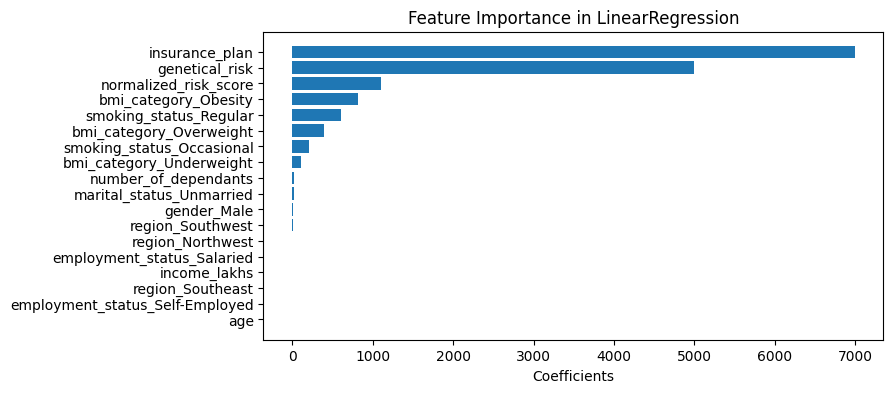

In [219]:
feature_importance = model_lr.coef_
coef_df = pd.DataFrame(feature_importance,X_test.columns,columns=['Coefficients'])  #(col_arr_items,index_items,col_name)
coef_df = coef_df.sort_values(by='Coefficients',ascending=True)

plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['Coefficients'])
plt.title('Feature Importance in LinearRegression')
plt.xlabel('Coefficients')
plt.show()

### Ridge Regression Model

In [220]:
model_rg = Ridge(alpha=1)
model_rg.fit(X_train,y_train)
train_score_rg = model_rg.score(X_train,y_train)
test_score_rg = model_rg.score(X_test,y_test)
train_score_rg,test_score_rg


(0.9882972960153418, 0.9887275909694276)

In [221]:
y_pred = model_rg.predict(X_test)
mse_rg = mean_squared_error(y_test,y_pred)
rmse_rg = np.sqrt(mse_rg)
mse_rg,rmse_rg

(85722.71885007418, np.float64(292.78442385153306))

### XGBoost Model

In [222]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.9876989126205444

In [223]:
y_pred = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test,y_pred)
rmse_xgb = np.sqrt(mse_xgb)
mse_xgb, rmse_xgb

(93545.5234375, np.float64(305.85212675000315))

In [224]:
model_xgb = XGBRegressor()

parameter_grid = {
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth': [3,4,5]
}

random_search = RandomizedSearchCV(model_xgb,parameter_grid,n_iter=10,cv=3,scoring='r2',random_state=42,n_jobs=-1)
random_search.fit(X_train,y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 4, ...], 'n_estimators': [20, 40, ...]}"
,n_iter,10
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [225]:
random_search.best_score_

np.float64(0.9879226088523865)

In [226]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [227]:
best_model = model_lr

## Checking Margin of Error in our best traiend model

In [228]:
y_pred = best_model.predict(X_test)
residual = y_pred-y_test
residual_pct = (residual/y_test)*100

result_df = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred,
    'diff':residual,
    'diff_pct':residual_pct
})

result_df.head()

,actual,predicted,diff,diff_pct
12774,6238,6121.456891,-116.543109,-1.868277
14758,9462,9601.797510,139.797510,1.477463
13205,5152,5611.056493,459.056493,8.910258
14278,6988,7423.486322,435.486322,6.231916
19351,4917,5112.056543,195.056543,3.966983


In [229]:
extreme_error_threshold = 10
total_extreme_result_df = result_df[abs(result_df['diff_pct'])>extreme_error_threshold]
total_extreme_result = result_df[abs(result_df['diff_pct'])>extreme_error_threshold].shape[0]
total_test_record = X_test.shape[0]
error_pct = (total_extreme_result/total_test_record)*100
error_pct

2.140723531364089

* We have now only 2% extreme errors which means only 2% customers we will either overcharge or undercharge by 10% or more

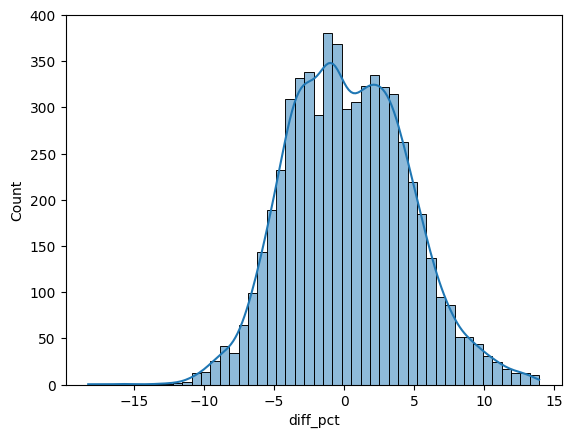

In [230]:
sns.histplot(result_df['diff_pct'],kde=True)
plt.show()

In [231]:
result_df[abs(result_df.diff_pct)>50].sort_values(by='diff_pct',ascending=False)

,actual,predicted,diff,diff_pct


* There will be no customers whom we will overcharge or underchage by more than 50%

## Exporting Model

In [233]:
from joblib import dump

dump(best_model,'artifacts/model_young.joblib')

scaler_with_cols = {
    'scaler':scaler,
    'cols_to_scale': col_to_scale
}
dump(scaler_with_cols,'artifacts/scaler_young.joblib')

['artifacts/scaler_young.joblib']